In [82]:
import pandas as pd
import numpy as np



Importing the data

In [83]:
url='https://raw.githubusercontent.com/Kprashar/CA4Blogger/main/kohkiloyeh.csv'
ds1=pd.read_csv(url) 
print(ds1.head())

   Degree caprice       topic  lmt lpss   pb
0    high    left  impression  yes  yes  yes
1    high    left   political  yes  yes  yes
2  medium  middle     tourism  yes  yes  yes
3    high    left   political  yes  yes  yes
4  medium  middle        news  yes  yes  yes


Using Label enconding

In [84]:
from sklearn.preprocessing import LabelEncoder
ds1=ds1.apply(LabelEncoder().fit_transform)
print(ds1.head())

   Degree  caprice  topic  lmt  lpss  pb
0       0        0      0    1     1   1
1       0        0      2    1     1   1
2       2        1      4    1     1   1
3       0        0      2    1     1   1
4       2        1      1    1     1   1


Creating data and targets

In [85]:
data= pd.DataFrame(ds1).drop('pb',axis=1)
print(data.head())

   Degree  caprice  topic  lmt  lpss
0       0        0      0    1     1
1       0        0      2    1     1
2       2        1      4    1     1
3       0        0      2    1     1
4       2        1      1    1     1


In [86]:
target= ds1['pb']
print(target.head())

0    1
1    1
2    1
3    1
4    1
Name: pb, dtype: int64


Checking empty values

In [87]:
ds1.isna().sum()


Degree     0
caprice    0
topic      0
lmt        0
lpss       0
pb         0
dtype: int64

Visualizing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


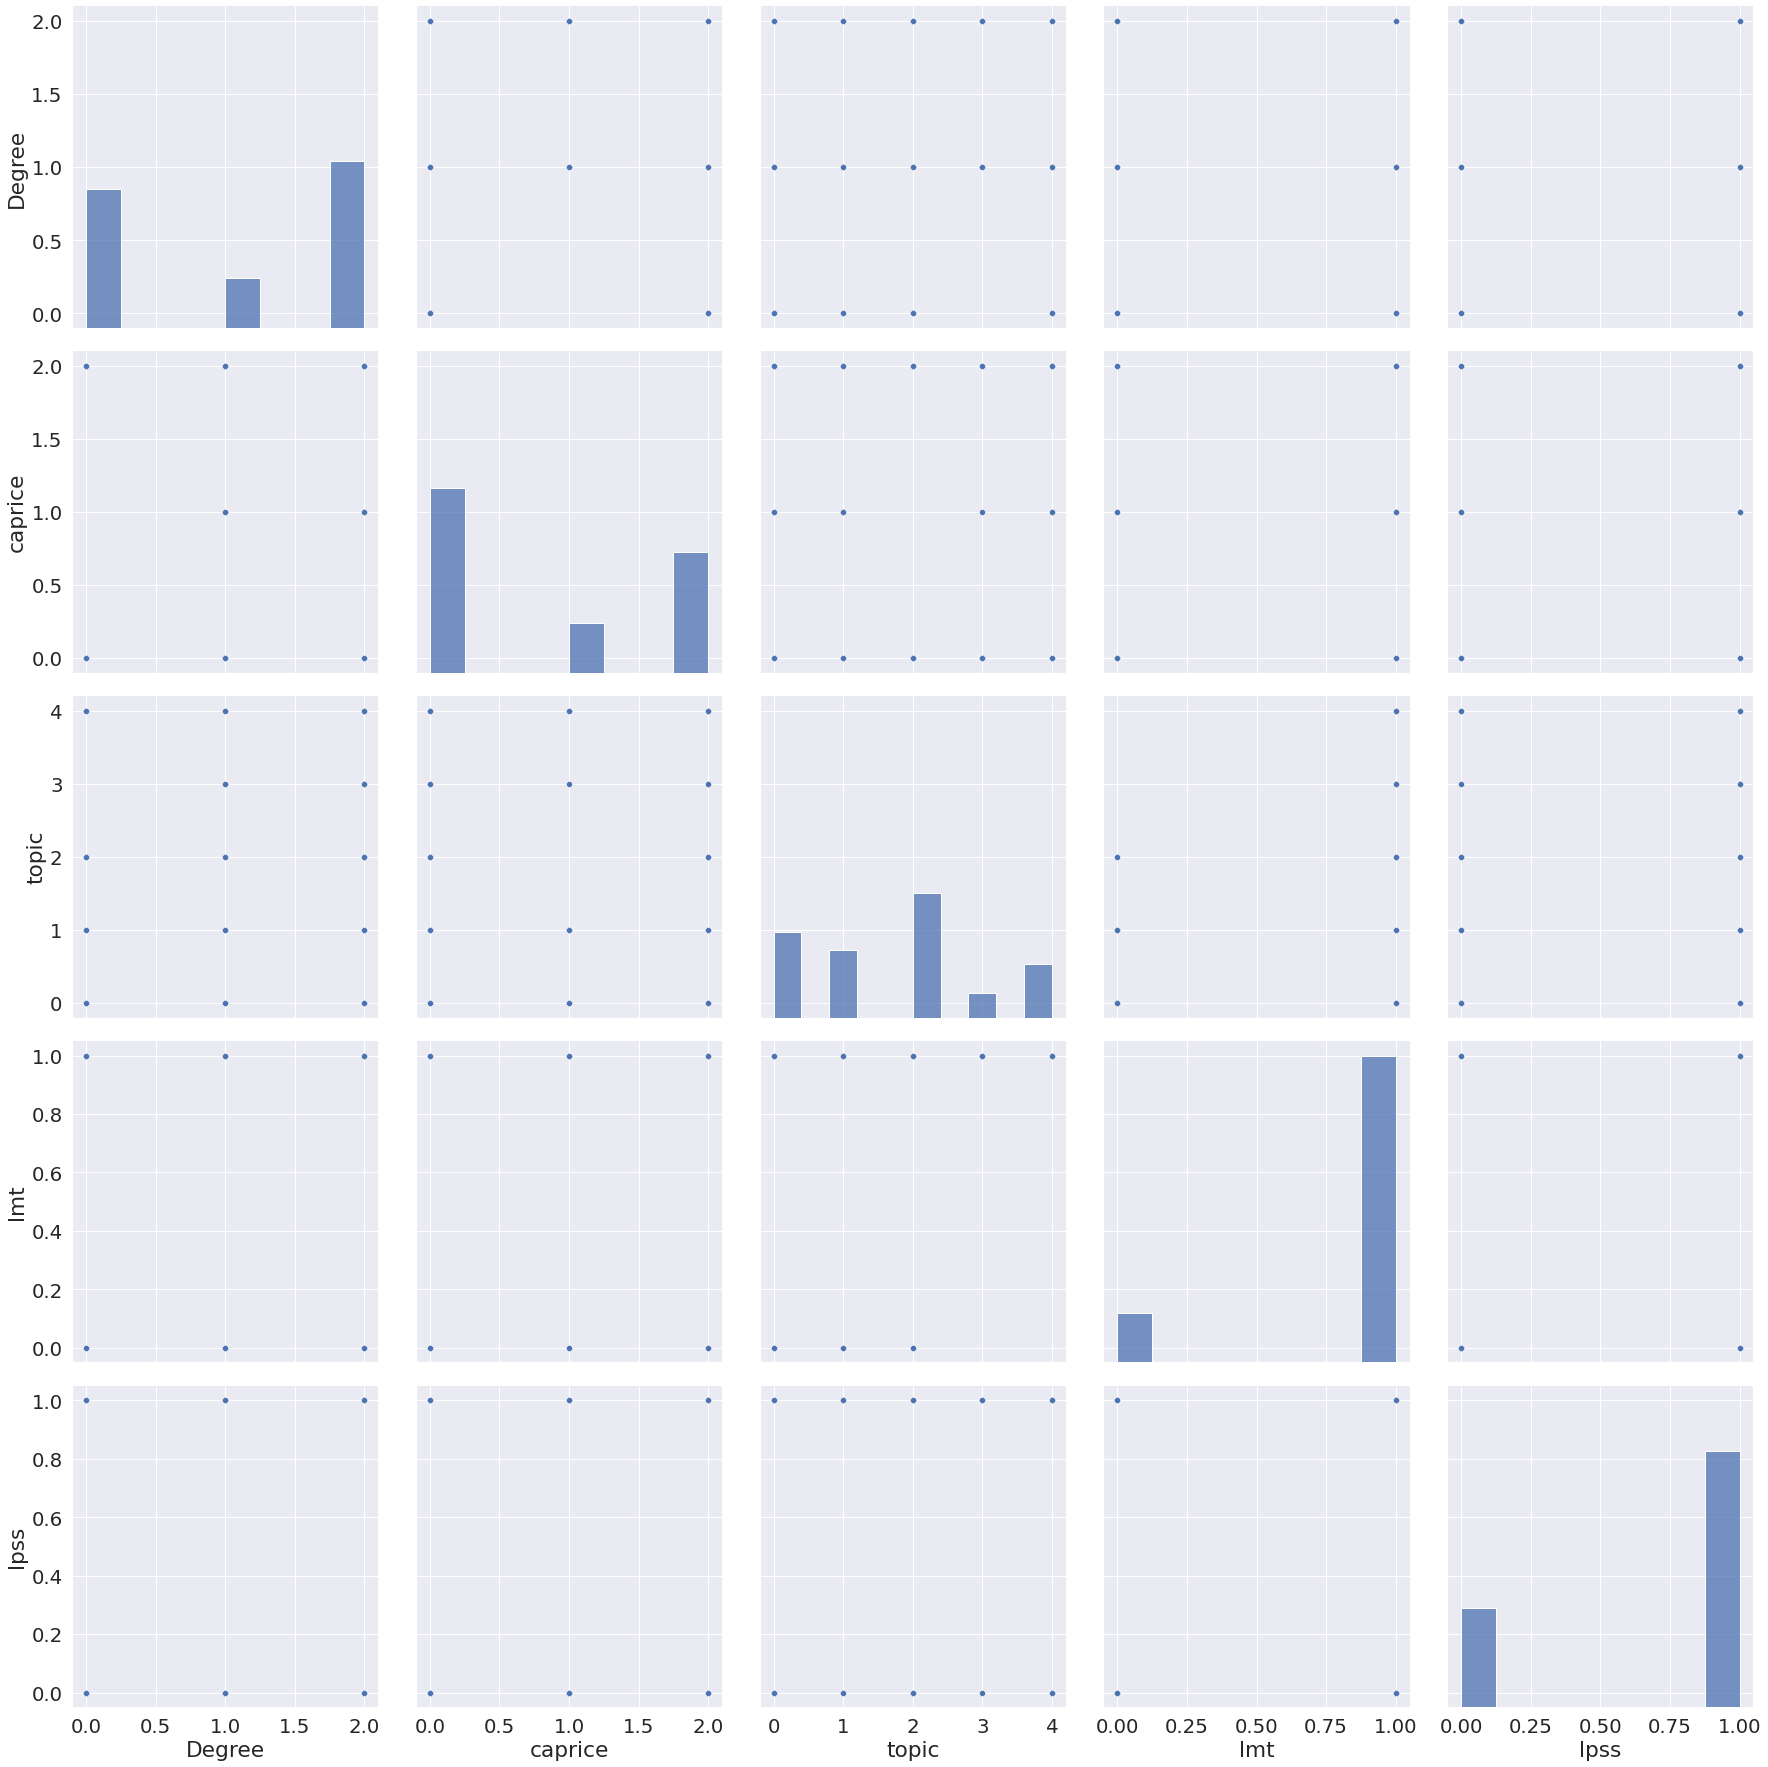

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
col=['Degree','caprice','topic','lmt','lpss']
sns.pairplot(data[col],size=5)
plt.tight_layout()
plt.show()

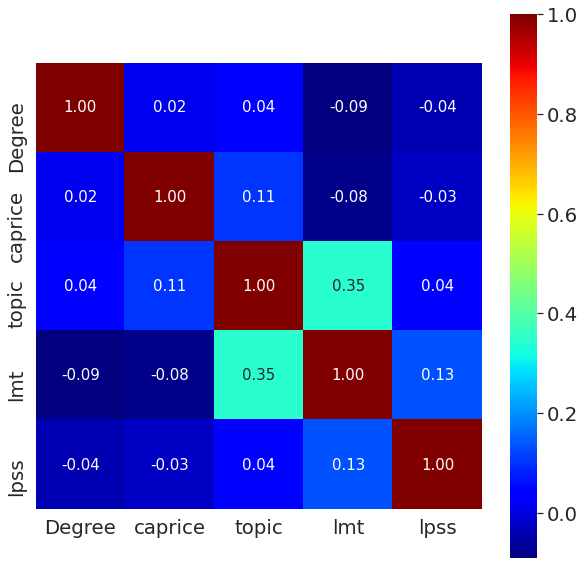

In [89]:
cm=np.corrcoef(data[col].values.T)
sns.set(font_scale=1.8)
plt.figure(figsize=(10,10))
heat=sns.heatmap(cm,cmap='jet', cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':15}, xticklabels=col, yticklabels=col)

Spiliting the data into train and test data

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data,target,train_size=0.80)

Standardizing the data

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

Using different types of model and compare them

In [92]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train_sc,y_train)
y_pred_knn_1=clf.predict(x_train_sc)
y_pred_knn_2=clf.predict(x_test_sc)

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_train,y_pred_knn_1))
print(classification_report(y_train,y_pred_knn_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_pred_knn_1))
print(confusion_matrix(y_test,y_pred_knn_2))
print(classification_report(y_test,y_pred_knn_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_knn_2))

[[11 10]
 [ 4 55]]
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        21
           1       0.85      0.93      0.89        59

    accuracy                           0.82        80
   macro avg       0.79      0.73      0.75        80
weighted avg       0.82      0.82      0.81        80

Accuracy score 0.82
[[5 6]
 [1 8]]
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.57      0.89      0.70         9

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20

Accuracy score 0.65


In [94]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion="gini",max_depth=10)
dec.fit(x_train_sc,y_train)
y_pred_dec_1=dec.predict(x_train_sc)
y_pred_dec_2=dec.predict(x_test_sc)


In [95]:
print(confusion_matrix(y_train,y_pred_dec_1))
print(classification_report(y_train,y_pred_dec_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_pred_dec_1))
print(confusion_matrix(y_test,y_pred_dec_2))
print(classification_report(y_test,y_pred_dec_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_dec_2))

[[21  0]
 [ 4 55]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.96        59

    accuracy                           0.95        80
   macro avg       0.92      0.97      0.94        80
weighted avg       0.96      0.95      0.95        80

Accuracy score 0.95
[[8 3]
 [1 8]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Accuracy score 0.80


In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train_sc,y_train)
y_pred_rf_1=rfc.predict(x_train_sc)
y_pred_rf_2=rfc.predict(x_test_sc)


In [97]:
print(confusion_matrix(y_train,y_pred_rf_1))
print(classification_report(y_train,y_pred_rf_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_pred_rf_1))

print(confusion_matrix(y_test,y_pred_rf_2))
print(classification_report(y_test,y_pred_rf_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_rf_2))


[[20  1]
 [ 3 56]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.98      0.95      0.97        59

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Accuracy score 0.95
[[7 4]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20

Accuracy score 0.75


In [98]:
from sklearn.svm import SVC
svm=SVC(kernel="linear", C=1,random_state=0)
svm.fit(x_train_sc,y_train)
y_prid_svc_1=svm.predict(x_train_sc)
y_prid_svc_2=svm.predict(x_test_sc)

In [99]:
print(confusion_matrix(y_train,y_prid_svc_1))
print(classification_report(y_train,y_prid_svc_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_prid_svc_1))

print(confusion_matrix(y_test,y_prid_svc_2))
print(classification_report(y_test,y_prid_svc_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_prid_svc_2))


[[ 9 12]
 [ 1 58]]
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        21
           1       0.83      0.98      0.90        59

    accuracy                           0.84        80
   macro avg       0.86      0.71      0.74        80
weighted avg       0.85      0.84      0.82        80

Accuracy score 0.84
[[2 9]
 [1 8]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.47      0.89      0.62         9

    accuracy                           0.50        20
   macro avg       0.57      0.54      0.45        20
weighted avg       0.58      0.50      0.43        20

Accuracy score 0.50


In [100]:
from sklearn.linear_model import Perceptron
pc=Perceptron(penalty='l2')
pc.fit(x_train_sc,y_train)
pridic_train_per_1=pc.predict(x_train_sc)
pridic_test_per_2=pc.predict(x_test_sc)

In [101]:
print(confusion_matrix(y_train,pridic_train_per_1))
print(classification_report(y_train,pridic_train_per_1))
print('Accuracy score %.2f'%accuracy_score(y_train,pridic_train_per_1))

print(confusion_matrix(y_test,pridic_test_per_2))
print(classification_report(y_test,pridic_test_per_2))
print('Accuracy score %.2f'%accuracy_score(y_test,pridic_test_per_2))

[[10 11]
 [ 2 57]]
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.84      0.97      0.90        59

    accuracy                           0.84        80
   macro avg       0.84      0.72      0.75        80
weighted avg       0.84      0.84      0.82        80

Accuracy score 0.84
[[2 9]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.50      1.00      0.67         9

    accuracy                           0.55        20
   macro avg       0.75      0.59      0.49        20
weighted avg       0.78      0.55      0.47        20

Accuracy score 0.55


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 0.812500 (0.100778)
KNN: 0.762500 (0.141973)
CART: 0.862500 (0.103833)
SVM: 0.800000 (0.082916)
PERCEP: 0.637500 (0.162500)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

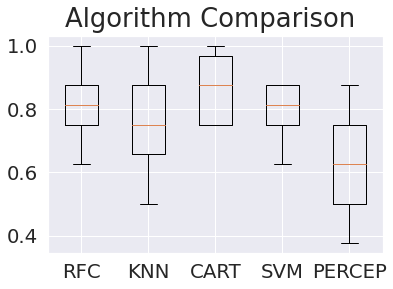

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('PERCEP', Perceptron()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, x_train_sc,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 0.700000 (0.331662)
KNN: 0.400000 (0.200000)
CART: 0.750000 (0.250000)
SVM: 0.350000 (0.320156)
PERCEP: 0.550000 (0.269258)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

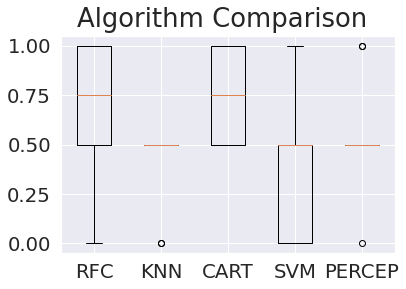

In [103]:

models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('PERCEP', Perceptron()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, x_test_sc,y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Hence by comparission the random forest is best